In [2]:
from datetime import datetime

import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data_dir = '../data/internet/'
whle_dir = data_dir + 'ph_internet_whole/ph_fixedinternet_whole.shp'
centroids_dir = '../data/ndhs/ndhs-centroids/DHS Clusters Points.shp'

In [5]:
ph_fixed_tiles = gp.read_file(whle_dir).to_crs('+proj=cea')
centroids_ = gp.read_file(centroids_dir).to_crs('+proj=cea')

In [6]:
ph_fixed_tiles.set_geometry(ph_fixed_tiles.geometry.centroid, inplace=True)
centroids_.set_geometry(centroids_.geometry.centroid, inplace=True)

In [117]:
distance_set = []
for i in centroid_pts[10:30]:
    distances = []
    for j in internet_pts:
        distances.append(i.distance(j) <= 5000)
    distance_set.append(distances)

surrounding_pts = []
for ind, i in enumerate(distance_set):
    surrounding_pts.append(internet_pts[distance_set[ind]])
ave_speed_per_cluster = []
for i in surrounding_pts:
    speeds = []
    for _ in i:
        speeds.append(ph_fixed_tiles[ph_fixed_tiles.geometry == _]['avg_d_kbps'].item())
    ave_speed_per_cluster.append(np.mean(speeds))

KeyboardInterrupt: 

In [152]:

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
for i in len(buffers_):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_fixed_tiles, buffers_test, how='inner', op='within')
    intpoint_test.plot(ax=ax, color='purple', alpha=0.1)

In [7]:
from scipy.stats import skew, kurtosis

In [8]:
def summary_stat(series_, mean_arr, max_arr, min_arr, std_arr, median_arr, skew_arr, cov_arr, kurtosis_arr):
    mean_arr.append(np.mean(series_))
    max_arr.append(np.max(series_))
    min_arr.append(np.min(series_))
    std_arr.append(np.std(series_))
    median_arr.append(np.median(series_))
    skew_arr.append(skew(series_))
    cov_arr.append(np.cov(series_))
    kurtosis_arr.append(kurtosis(series_))

In [30]:
# fig, ax = plt.subplots(figsize=(100,100))
# ph_fixed_tiles.plot(ax=ax)
# centroids_.plot(ax=ax)

avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis = [], [], [], [], [], [], [], []

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
datapoints_per_cluster = []
for i in range(len(buffers_)):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_fixed_tiles, buffers_test, how='inner', op='within')
    # intpoint_test.plot(ax=ax, color='purple', alpha=0.1)
    summary_stat(intpoint_test.avg_d_kbps, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis)
    summary_stat(intpoint_test.avg_u_kbps, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis)
    summary_stat(intpoint_test.avg_lat_ms, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis)
    datapoints_per_cluster.append(intpoint_test.shape[0])

with_no_data = 0
for i in datapoints_per_cluster:
    with_no_data = with_no_data + 1 if i == 0 else with_no_data
print('The number of points without data is {}, and the number of points with data is {}'.format(with_no_data, len(datapoints_per_cluster) - with_no_data))

# centroids_[:10].plot(ax=ax, color='red')


# buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
# data_in_buffers = gp.sjoin(ph_fixed_tiles, buffers_, how='inner', op='within')

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_584/3086358300.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\scipy\stats\stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = 

The number of points without data is 147, and the number of points with data is 1067


C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\scipy\stats\stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_584/3086358300.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramDat

### Save the Summary Statistics as DataFrames

In [20]:
avg_d_kbps_summary_stats = [avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis]
avg_d_kbps_summary_stats = pd.DataFrame(avg_d_kbps_summary_stats).transpose()
avg_d_kbps_summary_stats.columns = ['Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis']

avg_u_kbps_summary_stats = [avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis]
avg_u_kbps_summary_stats = pd.DataFrame(avg_u_kbps_summary_stats).transpose()
avg_u_kbps_summary_stats.columns = ['Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis']


avg_lat_ms_summary_stats = [avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis]
avg_lat_ms_summary_stats = pd.DataFrame(avg_lat_ms_summary_stats).transpose()
avg_lat_ms_summary_stats.columns = ['Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis']

### Summary Statistics On Mean Values (among Clusters)

In [45]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.mean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.median(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))



Average National Download Speed : 12.95 Mbps
Median of National Download Speed : 9.92 Mbps
Maximum National Download Speed : 34.03 Mbps
Minimum National Download Speed : 0.14 Mbps
Standard Deviation of National Download Speed : 7.43


In [46]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.mean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.median(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

Average National Upload Speed : 12.21 Mbps
Median of National Upload Speed : 12.77 Mbps
Maximum National Upload Speed : 43.19 Mbps
Minimum National Upload Speed : 0.08 Mbps
Standard Deviation of National Upload Speed : 7.80


In [47]:
print('Average National Latency : {:.2f} ms'.format(np.mean(avg_lat_ms_summary_stats['Mean'])))
print('Median of National Latency : {:.2f} ms'.format(np.median(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

Average National Latency : 59.50 ms
Median of National Latency : 43.26 ms
Maximum National Latency : 2273.67 ms
Minimum National Latency : 3.50 ms
Standard Deviation of National Latency : 80.52


### Plotting Mean Download Speeds

<AxesSubplot:>

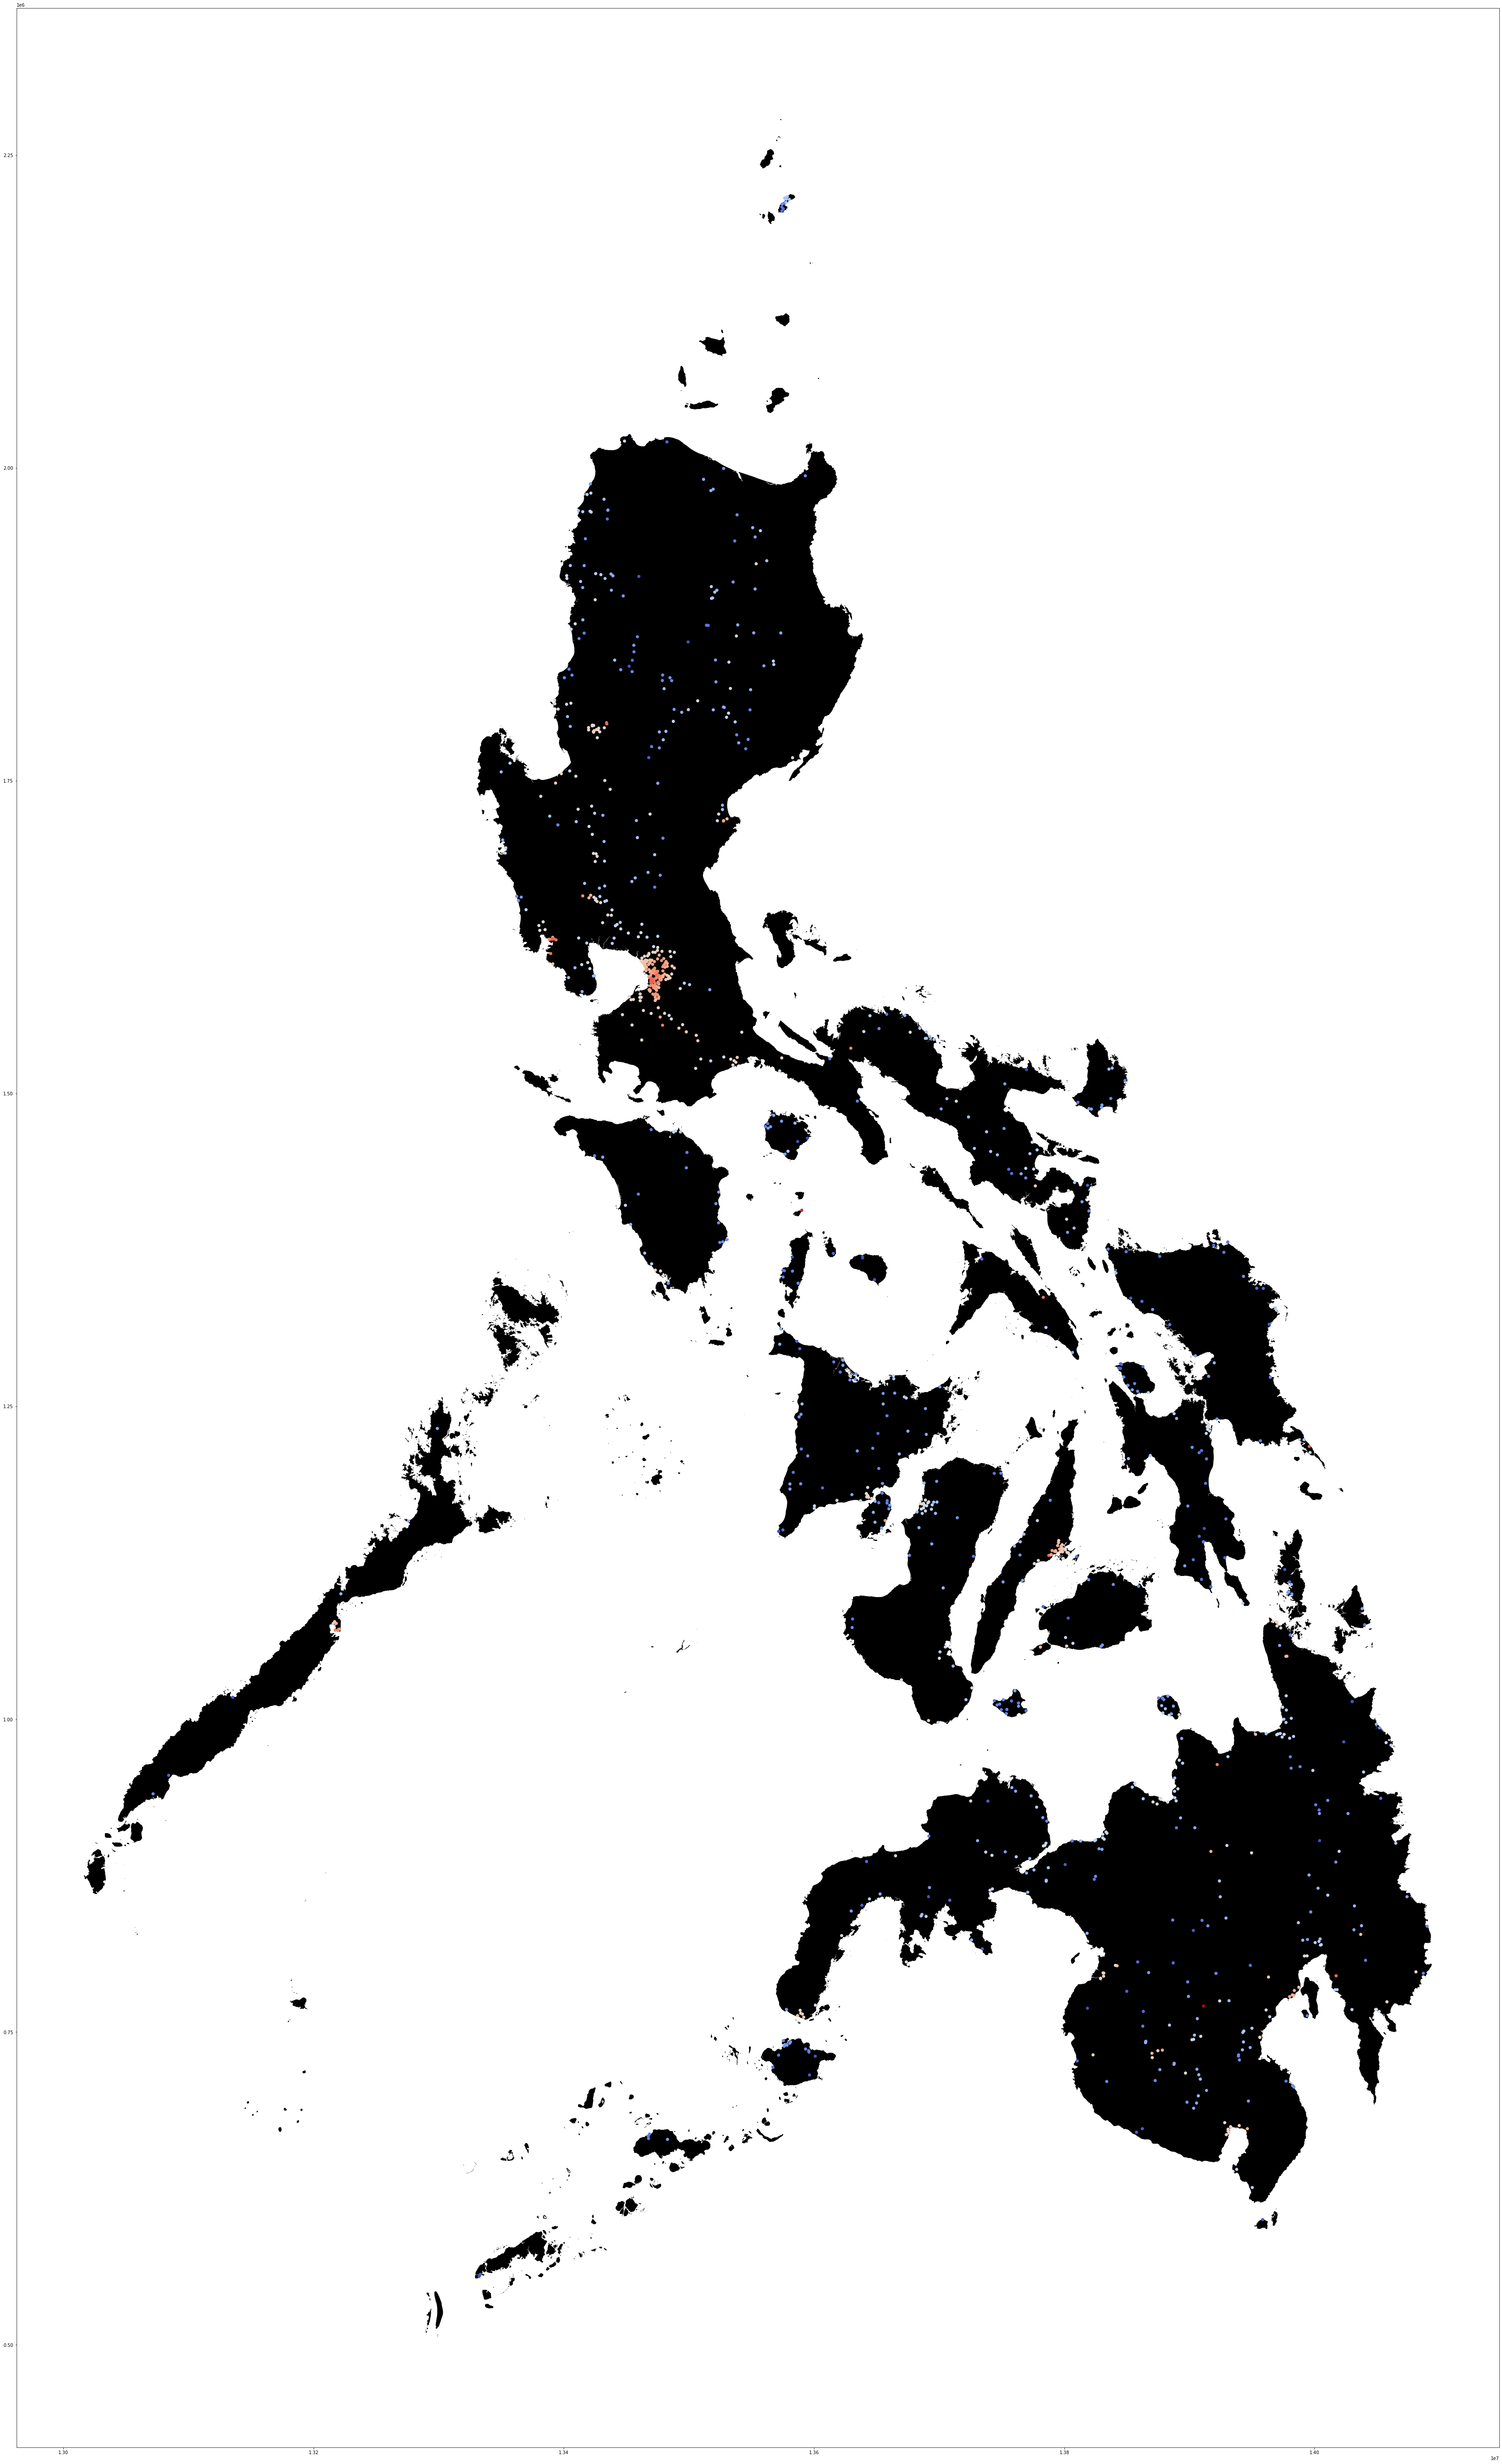

In [29]:
fig, ax = plt.subplots(figsize=(100, 100))

whole_ph_dir = '../data/internet/philippine_boundary/PHL_adm0.shp'
whole_ph = gp.read_file(whole_ph_dir).to_crs('+proj=cea')
whole_ph.plot(ax=ax, color='black')

_ = gp.GeoDataFrame(avg_d_kbps_cluster_mean, geometry=centroids_.geometry)
_.plot(ax=ax, column=0, cmap='coolwarm', legend=False, alpha=1)